In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
sales_file = "../clean_data/Output/all_salesdata.csv"
other_file = "../merged_data/merged_all_data.csv"
years = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

In [36]:
sales_df = pd.read_csv(sales_file)
other_df = pd.read_csv(other_file)

cleaner_df = other_df.drop(columns=['NAICS Code'])
employment_df = cleaner_df[['Description','Employment_2000','Employment_2001','Employment_2002','Employment_2003','Employment_2004',
                           'Employment_2005','Employment_2006','Employment_2007','Employment_2008','Employment_2009',
                           'Employment_2010','Employment_2011','Employment_2012','Employment_2013','Employment_2014','Employment_2015']]
establishment_df = cleaner_df[['Description','Establishments_2000','Establishments_2001','Establishments_2002','Establishments_2003',
                              'Establishments_2004','Establishments_2005','Establishments_2006','Establishments_2007','Establishments_2008',
                              'Establishments_2009','Establishments_2010','Establishments_2011','Establishments_2012','Establishments_2013',
                              'Establishments_2014','Establishments_2015']]
establishment_df = establishment_df.transpose()
establishment_df.columns = establishment_df.iloc[0]
establishment_df = establishment_df.drop(establishment_df.index[0])

employment_df = employment_df.transpose()
employment_df.columns = employment_df.iloc[0]
employment_df = employment_df.drop(employment_df.index[0])

employment_df = employment_df.rename(columns = {'Furniture and Home Furnishings Stores':'Furniture',
                                                'Electronics and Appliance Stores':'Electronics',
                                                'Grocery Stores':'Grocery',
                                                'Clothing and Clothing Accessories Stores':'Clothing'})
establishment_df = establishment_df.rename(columns = {'Furniture and Home Furnishings Stores':'Furniture',
                                                'Electronics and Appliance Stores':'Electronics',
                                                'Grocery Stores':'Grocery',
                                                'Clothing and Clothing Accessories Stores':'Clothing'})

employment_df.Furniture = pd.to_numeric(employment_df.Furniture.str.replace(',',''), errors = 'coerce')
employment_df.Electronics = pd.to_numeric(employment_df.Electronics.str.replace(',',''), errors = 'coerce')
employment_df.Grocery = pd.to_numeric(employment_df.Grocery.str.replace(',',''), errors = 'coerce')
employment_df.Clothing = pd.to_numeric(employment_df.Clothing.str.replace(',',''), errors = 'coerce')

establishment_df.Furniture = pd.to_numeric(establishment_df.Furniture.str.replace(',',''), errors = 'coerce')
establishment_df.Electronics = pd.to_numeric(establishment_df.Electronics.str.replace(',',''), errors = 'coerce')
establishment_df.Grocery = pd.to_numeric(establishment_df.Grocery.str.replace(',',''), errors = 'coerce')
establishment_df.Clothing = pd.to_numeric(establishment_df.Clothing.str.replace(',',''), errors = 'coerce')



In [37]:

establishment_df = establishment_df.reset_index(drop = True)
establishment_df['Year'] = years

establishment_df['furniture_sales_per_store'] = sales_df['furniture_sales'] / establishment_df['Furniture']
establishment_df['electronics_sales_per_store'] = sales_df['electronic_sales'] / establishment_df['Electronics']
establishment_df['grocery_sales_per_store'] = sales_df['grocery_sales'] / establishment_df['Grocery']
establishment_df['clothing_sales_per_store'] = sales_df['shopping_sales'] / establishment_df['Clothing']
establishment_df.set_index('Year')


Description,Furniture,Electronics,Grocery,Clothing,furniture_sales_per_store,electronics_sales_per_store,grocery_sales_per_store,clothing_sales_per_store
Year,,,,,,,,
2000,64842,45592,98275,150946,1.406465,1.982124,4.086360,1.107098
2001,65766,47747,99357,151668,1.390992,1.843236,4.212698,1.104999
2002,66360,49600,97166,151895,1.423568,1.838468,4.325505,1.134389
2003,65393,47746,96964,148012,1.477513,1.937440,4.417536,1.205423
2004,65728,49020,96130,149831,1.572039,2.032579,4.576605,1.264044
2005,66396,50176,95929,150580,1.642704,2.115115,4.771206,1.329486
2006,65854,49323,94176,152021,1.717724,2.232326,5.013273,1.400793
2007,65485,52470,92315,155371,1.701306,2.101353,5.327791,1.426180
2008,61735,49173,89054,155578,1.601101,2.213145,5.730849,1.394612


In [38]:
employment_df = employment_df.reset_index(drop = True)
employment_df['Year'] = years
employment_df['furniture_emp_per_store'] = employment_df['Furniture'] / establishment_df['Furniture']
employment_df['electronics_emp_per_store'] = employment_df['Electronics'] / establishment_df['Electronics']
employment_df['grocery_emp_per_store'] = employment_df['Grocery'] / establishment_df['Grocery']
employment_df['clothing_emp_per_store'] = employment_df['Clothing'] / establishment_df['Clothing']
employment_df.set_index('Year')


Description,Furniture,Electronics,Grocery,Clothing,furniture_emp_per_store,electronics_emp_per_store,grocery_emp_per_store,clothing_emp_per_store
Year,,,,,,,,
2000,549184,407321,2716868,1368665,8.469572,8.934045,27.645566,9.067249
2001,567318,425736,2665804,1392626,8.626311,8.916497,26.830561,9.182069
2002,551567,418725,2569351,1408948,8.311739,8.442036,26.442902,9.275802
2003,560717,419321,2594727,1467427,8.574572,8.782327,26.759694,9.914243
2004,576733,457819,2660804,1555098,8.774541,9.339433,27.679226,10.379014
2005,575629,469248,2642609,1555928,8.669634,9.352041,27.547551,10.332899
2006,578075,488784,2615175,1631450,8.778130,9.909859,27.769018,10.731741
2007,596538,500780,2564533,1648157,9.109537,9.544120,27.780242,10.607880
2008,533096,464927,2570754,1648150,8.635231,9.454924,28.867361,10.593721


In [44]:
c_salesstore = establishment_df.clothing_sales_per_store
f_salesstore = establishment_df.furniture_sales_per_store
e_salesstore = establishment_df.electronics_sales_per_store
g_salesstore = establishment_df.grocery_sales_per_store/2

c_empstore = employment_df.clothing_emp_per_store
f_empstore = employment_df.furniture_emp_per_store
e_empstore = employment_df.electronics_emp_per_store
g_empstore = employment_df.grocery_emp_per_store/2

x_axis = sales_df.Year



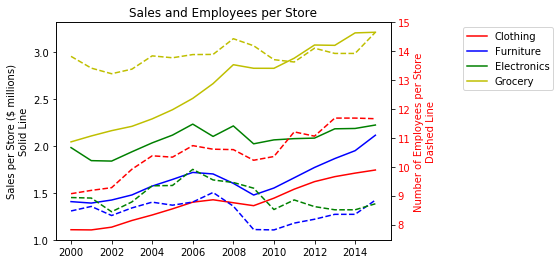

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_axis,c_salesstore,color='r',label='Clothing')
ax1.plot(x_axis,f_salesstore,color='b',label='Furniture')
ax1.plot(x_axis,e_salesstore,color='g',label='Electronics')
ax1.plot(x_axis,g_salesstore,color='y',label='Grocery')
ax1.set_ylabel('Sales per Store ($ millions)\nSolid Line')
plt.legend(loc="best",bbox_to_anchor=(1.2, 1))


ax2 = ax1.twinx()
ax2.plot(x_axis,c_empstore,'r--',label='Clothing')
ax2.plot(x_axis,f_empstore,'b--',label='Furniture')
ax2.plot(x_axis,e_empstore,'g--',label='Electronics')
ax2.plot(x_axis,g_empstore,'y--',label='Grocery')
plt.title("Sales and Employees per Store")
ax2.set_ylabel('Number of Employees per Store\nDashed Line', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.savefig("complete_plots/Sales_ratios.png", bbox_inches='tight')